Module importieren

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
from fitter import Fitter
import numpy as np
from scipy import stats
import statsmodels.api as sm
from tabulate import tabulate

Daten laden und säubern

In [13]:
def open_csv_to_df(directory):
    df = pd.read_csv(directory)
    df = df.iloc[0:,:4]
    df.columns = ["Date", "Time", "Mass_(kg)", "Velocity_(m/s)"]
    #df_energy = pd.DataFrame()
    df.insert(4, "Energy", "")
    df.insert(5, "Date_and_Time", "")
    df.insert(6, "Time_delta_(h)", "")
    for i in range(len(df)):
        df.iloc[i,4] = 0.5 * float(df.iloc[i,2]) * float(df.iloc[i,3]) ** 2 / 1000 #calculation of Energy
    df = df.sort_values(['Date', 'Time']).reset_index(drop=True)
    df = df.dropna()

    for i in range(len(df)):
        date_raw = df.iloc[i,:].Date +" " +df.iloc[i,:].Time
        date1 = datetime.strptime(date_raw, '%Y-%m-%d %H:%M')
        df.iloc[i,5] = date1

    for i in range(len(df)-1):
        date1 = df.iloc[i,5]
        date2 = df.iloc[i+1,5]
        time_delta = date2 - date1
        time_delta = (time_delta.days*24) + (time_delta.seconds//3600)
        df.iloc[i+1,6] = time_delta

    #Fitter kann keine NAs handhaben aus diesem Grund wird erste Beobachtung mit dem Median der Zeitabstände ersetzt.
    df.iloc[0,6] = 0
    df['Time_delta_(h)'] = df['Time_delta_(h)'].astype('int')
    df.iloc[0,6] = df["Time_delta_(h)"].median()

    return df #this is the table with all stones combined

In [14]:
df1 = open_csv_to_df("./out_1.csv")
df2 = open_csv_to_df("./out_2.csv")

In [15]:
df1.dtypes

Date               object
Time               object
Mass_(kg)         float64
Velocity_(m/s)    float64
Energy             object
Date_and_Time      object
Time_delta_(h)      int32
dtype: object

In [16]:
df1.head(5)

,Date,Time,Mass_(kg),Velocity_(m/s),Energy,Date_and_Time,Time_delta_(h)
0,2019-01-01,09:00,194.0,8.4,6.84432,2019-01-01 09:00:00,22
1,2019-01-01,21:00,224.0,8.8,8.67328,2019-01-01 21:00:00,12
2,2019-01-02,14:00,3104.0,9.2,131.36128,2019-01-02 14:00:00,17
3,2019-01-04,15:00,228.0,8.0,7.296,2019-01-04 15:00:00,49
4,2019-01-05,23:00,755.0,7.0,18.4975,2019-01-05 23:00:00,32


In [17]:
df2.dtypes

Date               object
Time               object
Mass_(kg)         float64
Velocity_(m/s)    float64
Energy             object
Date_and_Time      object
Time_delta_(h)    float64
dtype: object

In [18]:
df2.head(5)

,Date,Time,Mass_(kg),Velocity_(m/s),Energy,Date_and_Time,Time_delta_(h)
0,2019-01-01,09:00,38.0,45.4,39.16204,2019-01-01 09:00:00,48.5
1,2019-01-03,06:00,187.0,41.6,161.80736,2019-01-03 06:00:00,45.0
2,2019-01-04,10:00,36.0,44.6,35.80488,2019-01-04 10:00:00,28.0
3,2019-01-07,14:00,6.0,41.2,5.09232,2019-01-07 14:00:00,76.0
4,2019-01-11,06:00,65.0,39.6,50.9652,2019-01-11 06:00:00,88.0


In [19]:
def boxplot_compare(dataframe_1, dataframe_2, column, title):
    plt.figure(figsize=(8, 6), dpi=80)
    fig, (ax1, ax2) = plt.subplots(nrows = 1,ncols =  2)
    ax1.boxplot(dataframe_1[column])
    ax2.boxplot(dataframe_2[column])
    ax1.set_xticks([])
    ax2.set_xticks([])
    fig.suptitle(title, fontsize=16)
    ax1.set_title("Dataframe 1")
    ax1.set_ylabel(column)
    ax2.set_title('Dataframe 2')
    plt.show()

<Figure size 640x480 with 0 Axes>

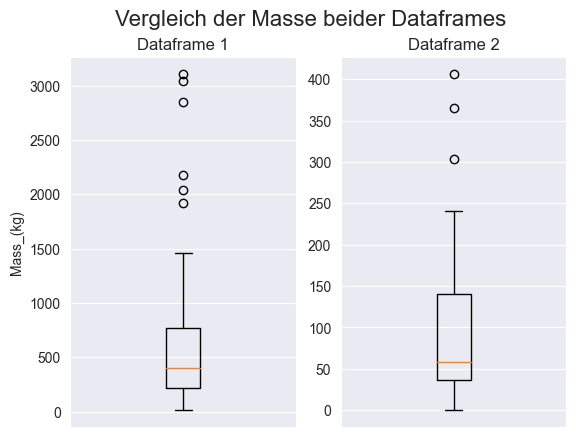

In [20]:
boxplot_compare(df1,df2,"Mass_(kg)", "Vergleich der Masse beider Dataframes")

<Figure size 640x480 with 0 Axes>

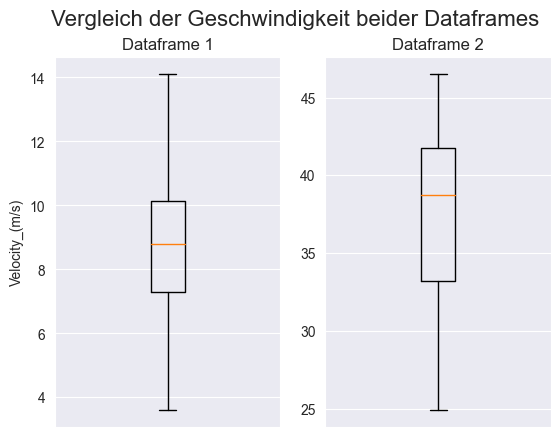

In [21]:
boxplot_compare(df1,df2,"Velocity_(m/s)", "Vergleich der Geschwindigkeit beider Dataframes")

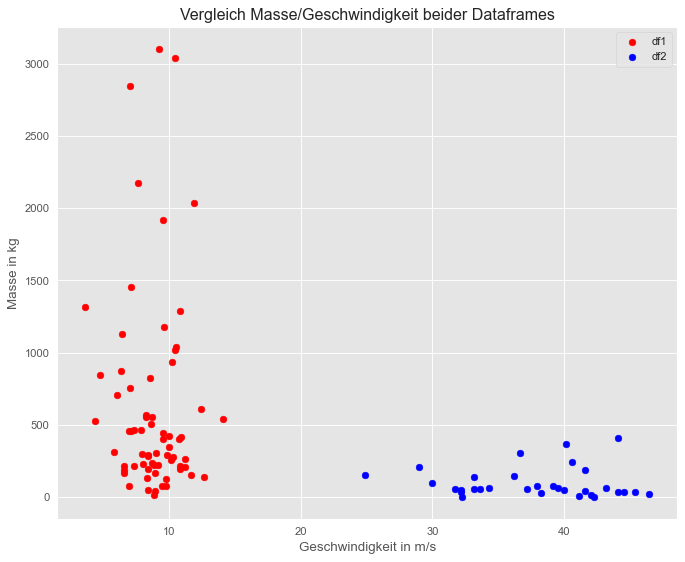

In [22]:
plt.figure(figsize=(10, 8), dpi=80)
plt.style.use('ggplot')
plt.title("Vergleich Masse/Geschwindigkeit beider Dataframes")
plt.xlabel("Geschwindigkeit in m/s")
plt.ylabel("Masse in kg")
plt.scatter(x = df1["Velocity_(m/s)"],y = df1["Mass_(kg)"], color = "red", label = "df1")
plt.scatter(x = df2["Velocity_(m/s)"],y = df2["Mass_(kg)"], color = "blue", label = "df2")

plt.legend(loc='upper right')
plt.show()

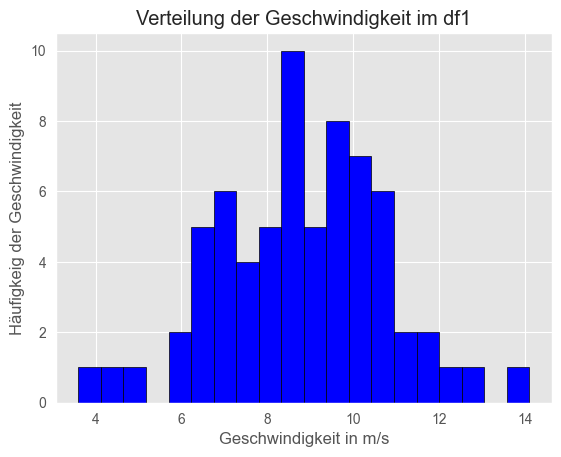

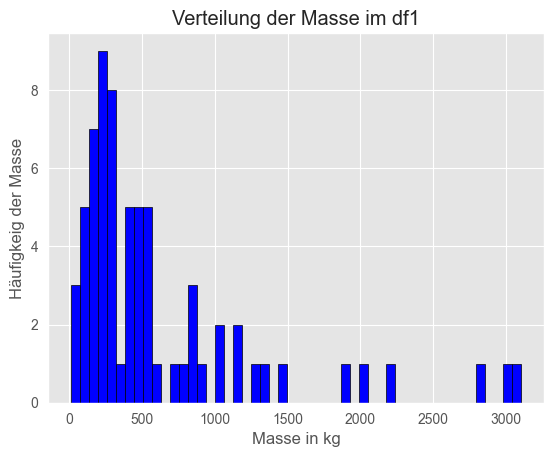

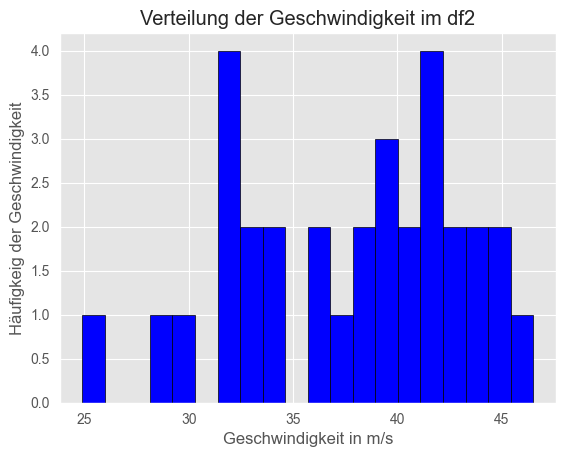

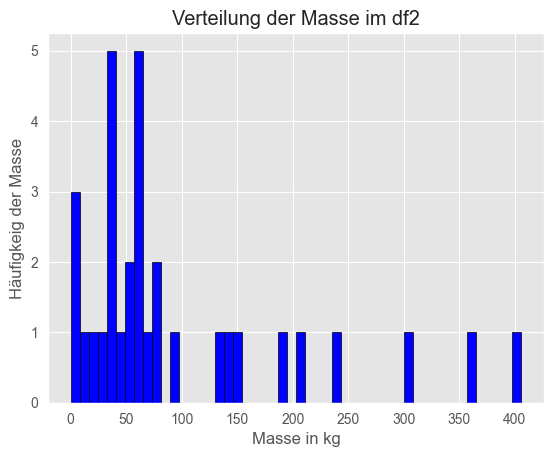

In [29]:
plt.hist(df1["Velocity_(m/s)"], color='blue', edgecolor='black', bins = 20)
plt.xlabel("Geschwindigkeit in m/s")
plt.ylabel("Häufigkeig der Geschwindigkeit")
plt.title("Verteilung der Geschwindigkeit im df1")
plt.show()

plt.hist(df1["Mass_(kg)"], color='blue', edgecolor='black', bins = 50)
plt.xlabel("Masse in kg")
plt.ylabel("Häufigkeig der Masse")
plt.title("Verteilung der Masse im df1")
plt.show()

plt.hist(df2["Velocity_(m/s)"], color='blue', edgecolor='black', bins = 20)
plt.xlabel("Geschwindigkeit in m/s")
plt.ylabel("Häufigkeig der Geschwindigkeit")
plt.title("Verteilung der Geschwindigkeit im df2")
plt.show()

plt.hist(df2["Mass_(kg)"], color='blue', edgecolor='black', bins = 50)
plt.xlabel("Masse in kg")
plt.ylabel("Häufigkeig der Masse")
plt.title("Verteilung der Masse im df2")
plt.show()


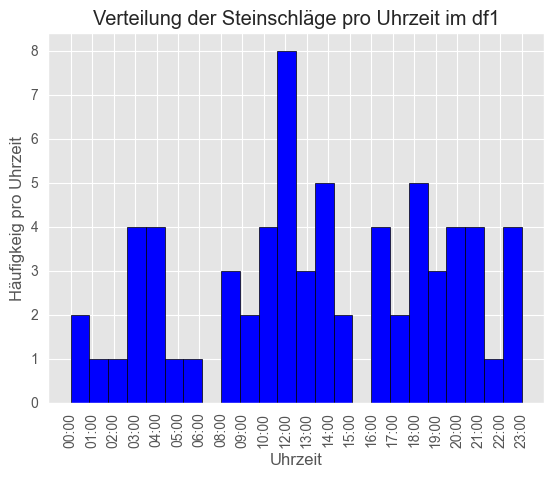

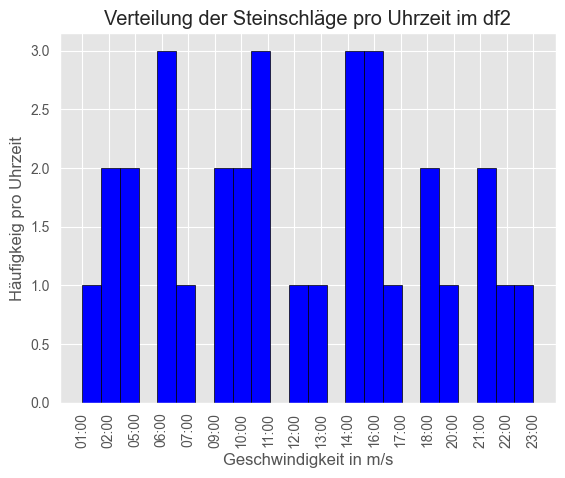

In [39]:
df1.sort_values(by="Time", inplace = True)
plt.hist(df1["Time"], color='blue', edgecolor='black', bins = 24)
plt.xticks(rotation=90)
plt.xlabel("Uhrzeit")
plt.ylabel("Häufigkeig pro Uhrzeit")
plt.title("Verteilung der Steinschläge pro Uhrzeit im df1")
plt.show()

df2.sort_values(by="Time", inplace = True)
plt.hist(df2["Time"], color='blue', edgecolor='black', bins = 24)
plt.xticks(rotation=90)
plt.xlabel("Geschwindigkeit in m/s")
plt.ylabel("Häufigkeig pro Uhrzeit")
plt.title("Verteilung der Steinschläge pro Uhrzeit im df2")
plt.show()

Funktion für Fitting von Verteilungen

In [12]:
def fit_distribution(data):
    count = 0
    fitted_mass = Fitter(data)
    fitted_mass.fit()
    ks_summary = fitted_mass.summary()
    distributions = ks_summary.index.values
    print(ks_summary.iloc[:,-2:])
    fig, ax = plt.subplots(1,5,figsize=(25, 5))
    table = [['Distribution', 'Parameters']]


    for i in distributions:
        param = fitted_mass.fitted_param[i]
        table.append([i, param])
        dist_eval = eval('stats.' + i + '.rvs(*param, size = 1000)')
        sm.qqplot_2samples(data, dist_eval, xlabel = i.capitalize() + ' Distribution', ylabel = 'Sample Distribution', line = '45' ,ax = ax[count])
        count += 1
    plt.show()
    print(tabulate(table, headers = 'firstrow'))

Zone 1

In [13]:
#fit_distribution(df1['Mass_(kg)'])

In [14]:
#fit_distribution(df1["Velocity_(m/s)"])

In [15]:
#fit_distribution(df1["Time_delta_(h)"])

Zone 2

In [16]:
#fit_distribution(df2['Mass_(kg)'])

In [17]:
#fit_distribution(df2["Velocity_(m/s)"])

Fitting 109 distributions:  45%|████▍     | 49/109 [00:05<00:08,  7.10it/s]WARNING:root:SKIPPED kstwo distribution (taking more than 30 seconds)
C:\Users\wartm\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_continuous_distns.py:3405: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 109 distributions:  98%|█████████▊| 107/109 [00:42<00:05,  2.54s/it]C:\Users\wartm\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integ

            ks_statistic  ks_pvalue
mielke          0.133036   0.577047
chi             0.124432   0.659214
exponpow        0.111520   0.780292
beta            0.108391   0.807793
gausshyper      0.097584   0.891864


KeyboardInterrupt: 

C:\Users\wartm\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Error in callback <function _draw_all_if_interactive at 0x0000018AD9B6C1F0> (for post_execute):


KeyboardInterrupt: 

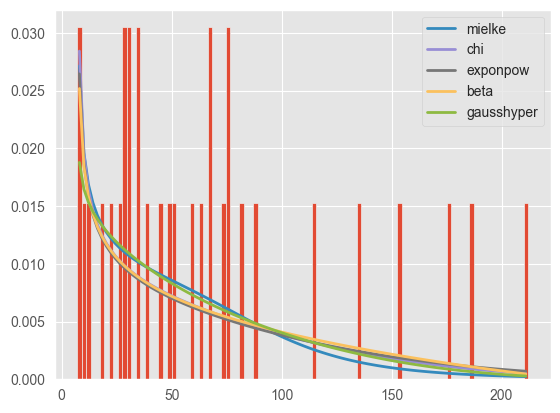

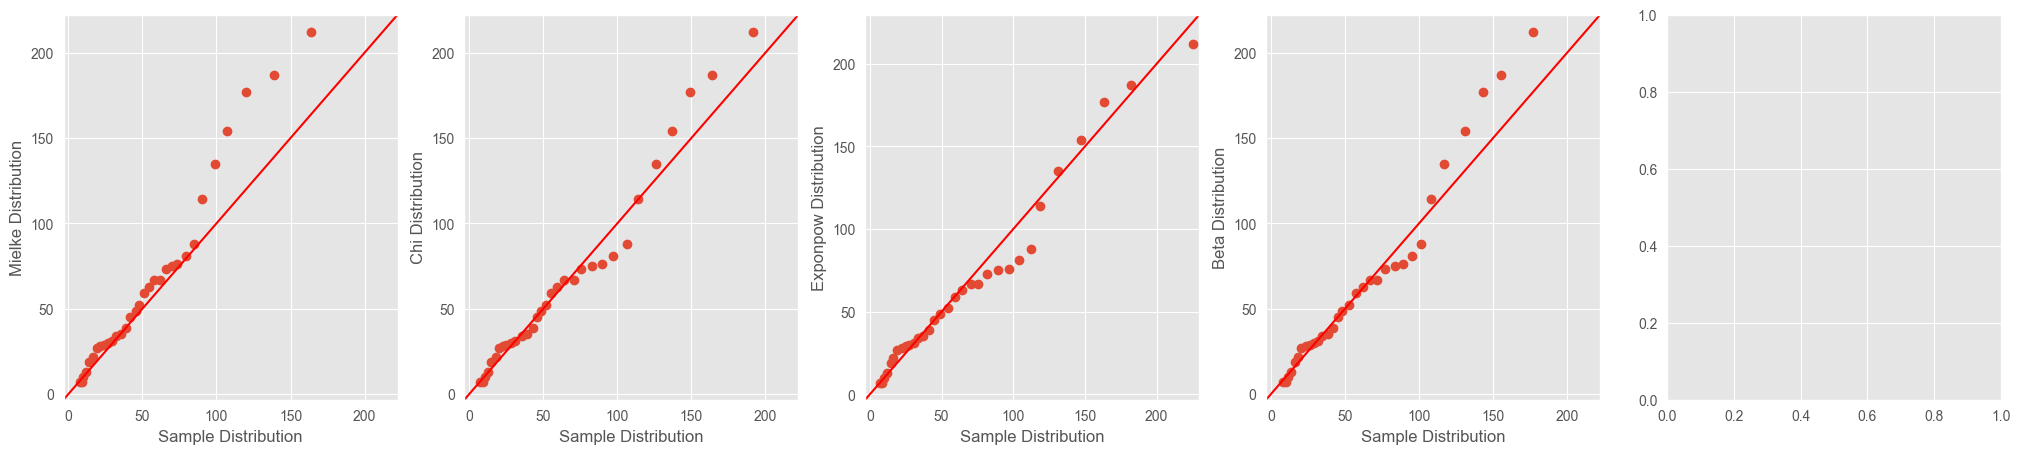

In [18]:
fit_distribution(df2["Time_delta_(h)"])

Monte Carlo

In [ ]:
def plot_verteilung(dataframe, x_val):
    sns.set_style("white")
    sns.set_context("paper", font_scale = 1.5)
    sns.displot(data = dataframe, x = x_val, kind = "hist", bins = 150, aspect = 3.0)

Zone 1

In [ ]:
mass1_sim = stats.norminvgauss.rvs(3.1212660746620413, 3.049636729092045, 34.65446329649014, 129.49172019279249, size = 10000)
df1_mass_sim = pd.DataFrame(mass1_sim)
#df1_mass_sim[df1_mass_sim[0] < 0][0]

In [ ]:
velocity1_sim = stats.norminvgauss.rvs(8.815229190843102, -1.1717104407578982, 9.56468292816113, 5.789676074259544, size = 10000)
df1_velocity_sim = pd.DataFrame(velocity1_sim)

In [ ]:
timedelta1_sim = stats.chi.rvs(0.6466917035616518, -8.620646255400194e-27, 50.086113926689904, size = 1000000)
df1_timedelta_sim = pd.DataFrame(timedelta1_sim)

Zone 2

In [ ]:
mass2_sim = stats.skewcauchy.rvs(0.5654845478523323, 31.009036433794673, 28.383685799048294, size = 1000000)
df2_mass_sim = pd.DataFrame(mass2_sim)

In [ ]:
velocity2_sim = stats.beta.rvs(2.135456049863241, 1.2827668923945292, 23.092130432299154, 23.56888476645474, size = 1000000)
df2_velocity_sim = pd.DataFrame(velocity2_sim)

In [ ]:
timedelta2_sim = stats.expon.rvs(7.0, 59.322580645161295, size = 1000000)
df2_timedelta_sim = pd.DataFrame(timedelta2_sim)